# Data Cleaning 2: missing values

## <br>By Jean-Philippe Pitteloud</br>

### Requirements

In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

### Data Gathering

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing 
engine.dispose()

In [3]:
edu_df.tail()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304
1491,2017_WYOMING,WYOMING,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.820619,288.761812,226.831211,269.371456


**1. Determine all the variable types and then find the fraction of the missing values for each variable**

As it can be seen in the table below, most of the variables are formatted as numeric (float or integer), while only 'PRIMARY_KEY' and 'STATE' are formatted as categorical variables (strings/object)

In [4]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

The percentage of missing values present in each variable was calculated and the results summarized below. Fields that report the average scores for math and reading at different levels are the one with the highest percentage of missing values (over 60%) which makes them good candidates for throrough scrutiny. All other variables will have values missing in percentages that range from 0-18%. These variables might be good candidates for inputation after a detailed assessment

In [5]:
edu_df.isnull().sum()*100/edu_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

To complete assessing the quality of the variables in terms of missing values, programmatic evaluation of the data for possible use of characters and symbols to refer to missing data in numeric variables was carried on. As seen above, none of the numeric fields contained data different than numbers or missing data reported as 'Nan'

In [6]:
numeric_cols = edu_df[['YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]

# print all values that cannot be converted to float
for column_name in numeric_cols:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in edu_df[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: YEAR
These are the problematic values for the variable: ENROLL
These are the problematic values for the variable: TOTAL_REVENUE
These are the problematic values for the variable: FEDERAL_REVENUE
These are the problematic values for the variable: STATE_REVENUE
These are the problematic values for the variable: LOCAL_REVENUE
These are the problematic values for the variable: TOTAL_EXPENDITURE
These are the problematic values for the variable: INSTRUCTION_EXPENDITURE
These are the problematic values for the variable: SUPPORT_SERVICES_EXPENDITURE
These are the problematic values for the variable: OTHER_EXPENDITURE
These are the problematic values for the variable: CAPITAL_OUTLAY_EXPENDITURE
These are the problematic values for the variable: GRADES_PK_G
These are the problematic values for the variable: GRADES_KG_G
These are the problematic values for the variable: GRADES_4_G
These are the problematic values for the variable: GRADES_8_G
The

Before devising a strategy for dealing with the missing values in the dataset, an evaluation of the distribution of the numeric variables deemed necessary. As seen below, none of the variables are normally distributed and skewed to the right causing the "mean" and the "median" to report different values. In order to input the missing values, choosing the "median" as a measure of central tendency will preserve the original distribution of the data

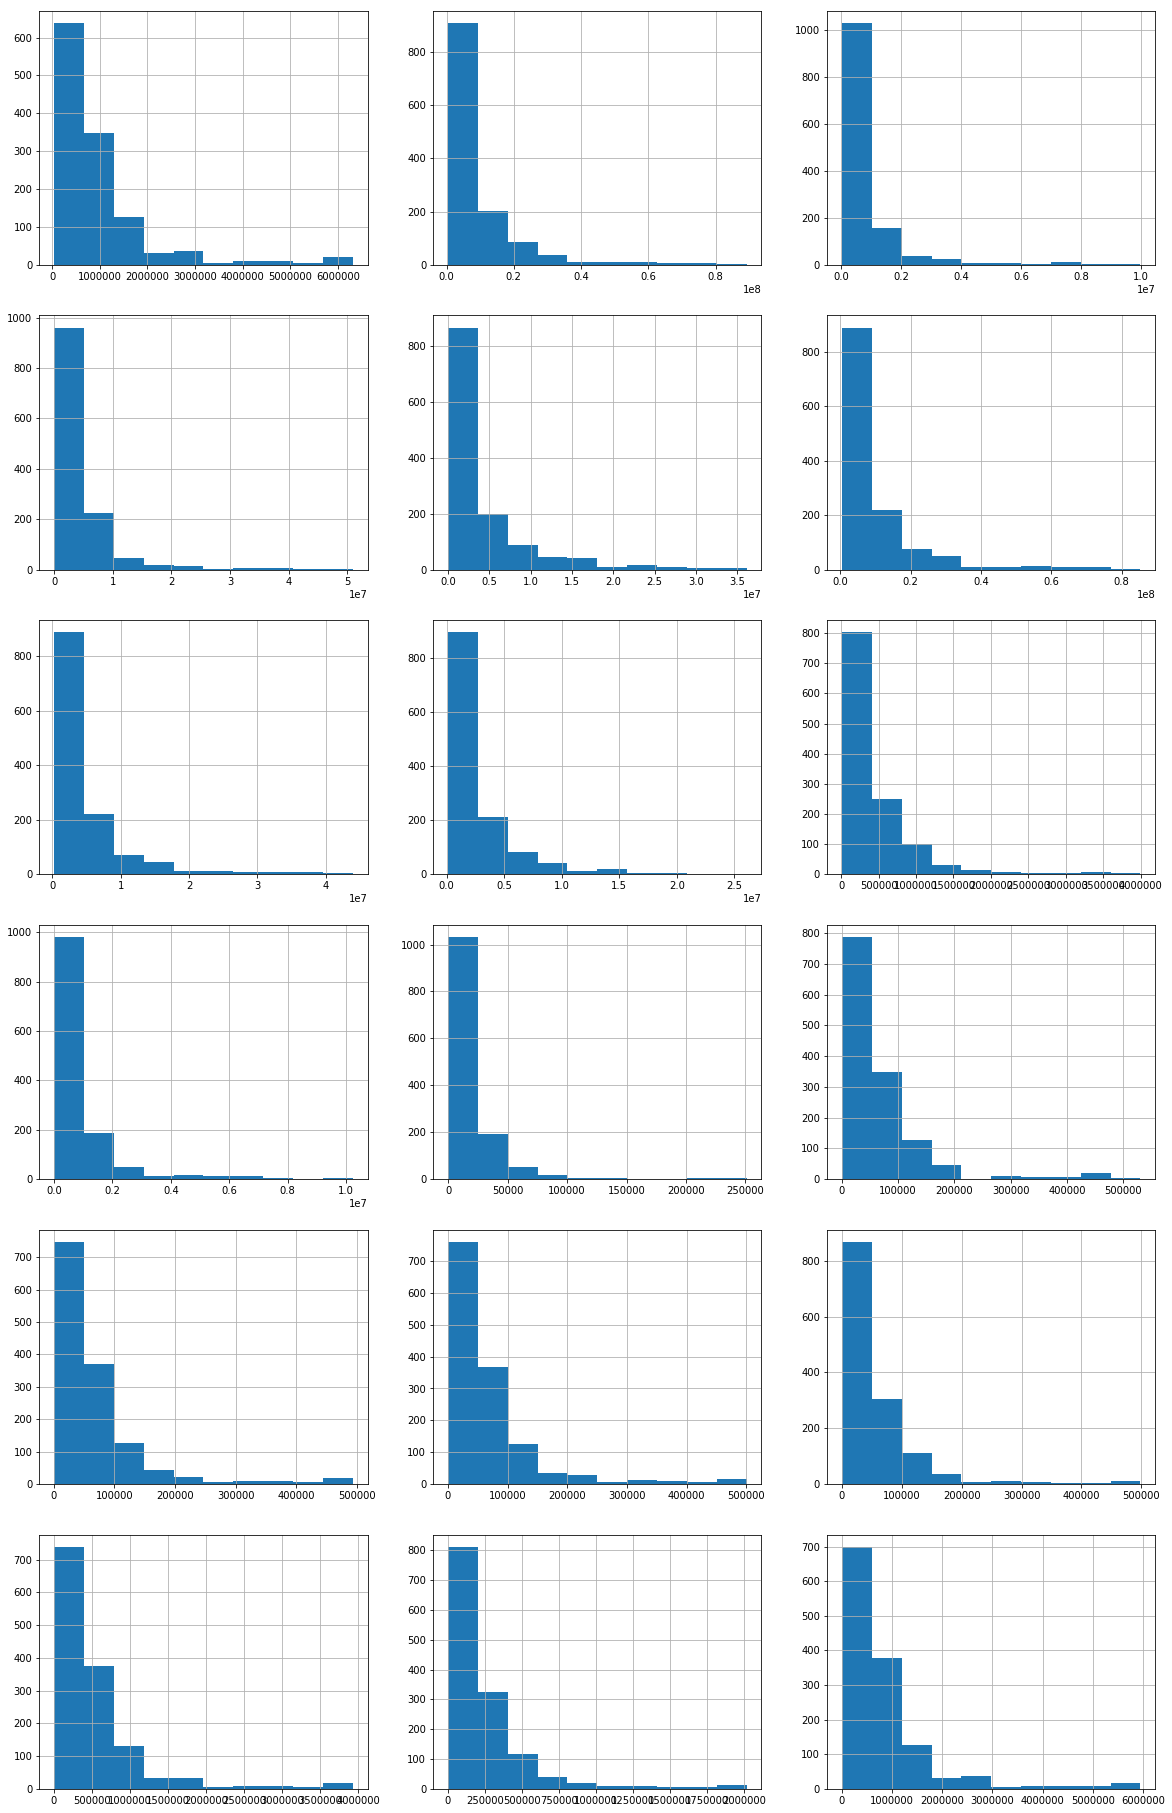

In [7]:
fig = plt.figure(figsize=(20,100))

columns = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for i, column in enumerate(columns):
    plt.subplot(len(columns), 3, i+1)
    edu_df[column].hist();

The following summary table, highlights the mentioned differences between the "median" and the "mean" for the variables present in our working dataset. It is evident that for all variables, the value of "median" is lower than the value of "mean", and from the plots above, the use of "median" will be better to represent the most of the data in the variable

In [8]:
summary_df = pd.DataFrame(index = ['mean', 'median', 'std'])

for column in columns:
    summary_df[column] = ''
    column_mean = edu_df[column].mean()
    column_median = edu_df[column].median()
    column_std = edu_df[column].std()
    summary_df.at[['mean', 'median', 'std'], column] = column_mean, column_median, column_std

In [9]:
summary_df

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
mean,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,429204.616762,9.027693e+05,17601.614102,63746.761029,64538.927259,64271.057311,54268.92432,519214.036003,247071.351947,802441.512509
median,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,271596.000000,5.102595e+05,8106.000000,41597.500000,43272.000000,43339.000000,36735.00000,345775.000000,164260.000000,550342.000000
std,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,534069.318693,1.327562e+06,30016.166447,80205.138143,80293.387625,78910.545776,67889.27623,643638.426231,307705.629118,970703.074957


**2. Notice that the data has a time dimension (year). For this assignment, forget about the time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables, filling in the missing values with some value makes more sense and for which it doesn't**

In this particular example, the missing data in each variable was replaced with the calculated median of the corresponding variable

In [10]:
edu_median_df2 = edu_df.copy()

for column in columns:
    edu_median_df2.loc[:, column].fillna(edu_median_df2.loc[:, column].median(), inplace=True)

Below, summary statistics for each variable in the original dataset and the modified dataset were calculated and presented. As expected, the values of "median" did not change while values of "mean" and "standard deviation" did to different extents

In [11]:
summary_df2 = pd.DataFrame(index = ['mean', 'median', 'std'])

df1 = [edu_df, edu_median_df2]

for column in columns:
    for i, df in enumerate(df1):
        summary_df2[str(column) + str(i+1)] = ''
        column_mean = df[column].mean()
        column_median = df[column].median()
        column_std = df[column].std()
        summary_df2.at[['mean', 'median', 'std'], str(column) + str(i+1)] = column_mean, column_median, column_std

In [12]:
summary_df2

,ENROLL1,ENROLL2,TOTAL_REVENUE1,TOTAL_REVENUE2,FEDERAL_REVENUE1,FEDERAL_REVENUE2,STATE_REVENUE1,STATE_REVENUE2,LOCAL_REVENUE1,LOCAL_REVENUE2,...,GRADES_8_G1,GRADES_8_G2,GRADES_12_G1,GRADES_12_G2,GRADES_1_8_G1,GRADES_1_8_G2,GRADES_9_12_G1,GRADES_9_12_G2,GRADES_ALL_G1,GRADES_ALL_G2
mean,9.159308e+05,868756.902145,9.092082e+06,8.521936e+06,7.663723e+05,7.147938e+05,4.216553e+06,3.977914e+06,4.109157e+06,3.817390e+06,...,64271.057311,62433.189008,54268.92432,52729.417560,519214.036003,503985.809651,247071.351947,239800.382038,802441.512509,773210.134718
median,6.483130e+05,648313.000000,5.079546e+06,5.079546e+06,4.033765e+05,4.033765e+05,2.537074e+06,2.537074e+06,2.055780e+06,2.055780e+06,...,43339.000000,43339.000000,36735.00000,36735.000000,345775.000000,345775.000000,164260.000000,164260.000000,550342.000000,550342.000000
std,1.065280e+06,972139.562430,1.174519e+07,1.096808e+07,1.145242e+06,1.068252e+06,5.543072e+06,5.167296e+06,5.482971e+06,5.128620e+06,...,78910.545776,75596.918687,67889.27623,65028.062289,643638.426231,616671.147843,307705.629118,294810.957460,970703.074957,916216.725359


In [13]:
edu_median_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

As it can be seen in the summary table above, most of the fields were effectively completed by replacing any missing values with the median of the each corresponding field. Other fields with missing values issues were not succesfully addressed, therefore, a different approach will be necessary

**3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year**

For this question, the missing values for each variable were replaced using the "median" calculated yearly

In [14]:
edu_median_df3 = edu_df.copy()
years = edu_median_df3["YEAR"].unique()

for column in columns:
    for year in years:
        edu_median_df3.loc[edu_median_df3["YEAR"] == year, column].fillna(edu_median_df3[edu_median_df3["YEAR"] == year][column].median(), inplace=True)

In [15]:
summary_df3 = pd.DataFrame(index = ['mean', 'median', 'std'])

df2 = [edu_df, edu_median_df3]

for column in columns:
    for i, df in enumerate(df2):
        summary_df3[str(column) + str(i+1)] = ''
        column_mean = df[column].mean()
        column_median = df[column].median()
        column_std = df[column].std()
        summary_df3.at[['mean', 'median', 'std'], str(column) + str(i+1)] = column_mean, column_median, column_std

In the table below, a comparison between the statistics of each of the groups(1-3) highlights the effectiveness of the last approach (input missing values using the yearly median value) to preserve the identity and distribution of the original data

In [16]:
summary_df3

,ENROLL1,ENROLL2,TOTAL_REVENUE1,TOTAL_REVENUE2,FEDERAL_REVENUE1,FEDERAL_REVENUE2,STATE_REVENUE1,STATE_REVENUE2,LOCAL_REVENUE1,LOCAL_REVENUE2,...,GRADES_8_G1,GRADES_8_G2,GRADES_12_G1,GRADES_12_G2,GRADES_1_8_G1,GRADES_1_8_G2,GRADES_9_12_G1,GRADES_9_12_G2,GRADES_ALL_G1,GRADES_ALL_G2
mean,9.159308e+05,9.159308e+05,9.092082e+06,9.092082e+06,7.663723e+05,7.663723e+05,4.216553e+06,4.216553e+06,4.109157e+06,4.109157e+06,...,64271.057311,64271.057311,54268.92432,54268.92432,519214.036003,519214.036003,247071.351947,247071.351947,802441.512509,802441.512509
median,6.483130e+05,6.483130e+05,5.079546e+06,5.079546e+06,4.033765e+05,4.033765e+05,2.537074e+06,2.537074e+06,2.055780e+06,2.055780e+06,...,43339.000000,43339.000000,36735.00000,36735.00000,345775.000000,345775.000000,164260.000000,164260.000000,550342.000000,550342.000000
std,1.065280e+06,1.065280e+06,1.174519e+07,1.174519e+07,1.145242e+06,1.145242e+06,5.543072e+06,5.543072e+06,5.482971e+06,5.482971e+06,...,78910.545776,78910.545776,67889.27623,67889.27623,643638.426231,643638.426231,307705.629118,307705.629118,970703.074957,970703.074957


In [17]:
edu_median_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In the chart above, it results evident that the approach taken was not succesful in replacing missing values in many columns in the dataset. The use of the "median" value for a given year to replace the missing values for that same year resulted in missing values due to the lack of information for the entire year. Although the summary statistics calculated after implementing this approach were similar to the original statistics, the fact that it could not effectively address the missing values in certain columns makes it an unviable option 

**4. This time, fill in the missing values using interpolation (extrapolation)**

As our fourth method of replacing missing values, the built-in method 'interpolate' was employed on every variable present in our dataset. Success of this method is not very likely considering the nature of our data. The use of this method (default parameters) is expected to replace missing values treating the values in the variable as equally spaced, which is not the case for our data

In [18]:
edu_inter_df = edu_df.copy()

for column in columns:
    edu_inter_df.loc[:, column].interpolate(inplace=True)

In [19]:
summary_df4 = pd.DataFrame(index = ['mean', 'median', 'std'])

df3 = [edu_df, edu_inter_df]

for column in columns:
    for i, df in enumerate(df3):
        summary_df4[str(column) + str(i+1)] = ''
        column_mean = df[column].mean()
        column_median = df[column].median()
        column_std = df[column].std()
        summary_df4.at[['mean', 'median', 'std'], str(column) + str(i+1)] = column_mean, column_median, column_std

As it can be seen in the summary table below, the use of interpolation to replace the missing values resulted in over- or underestimation of the summary statistics of the original dataset, therefore changing its nature and distribution

In [20]:
summary_df4

,ENROLL1,ENROLL2,TOTAL_REVENUE1,TOTAL_REVENUE2,FEDERAL_REVENUE1,FEDERAL_REVENUE2,STATE_REVENUE1,STATE_REVENUE2,LOCAL_REVENUE1,LOCAL_REVENUE2,...,GRADES_8_G1,GRADES_8_G2,GRADES_12_G1,GRADES_12_G2,GRADES_1_8_G1,GRADES_1_8_G2,GRADES_9_12_G1,GRADES_9_12_G2,GRADES_ALL_G1,GRADES_ALL_G2
mean,9.159308e+05,1.005984e+06,9.092082e+06,1.111164e+07,7.663723e+05,8.922691e+05,4.216553e+06,4.913351e+06,4.109157e+06,5.306024e+06,...,64271.057311,59511.380027,54268.92432,50207.239276,519214.036003,481010.188003,247071.351947,228667.802279,802441.512509,747878.200402
median,6.483130e+05,7.540845e+05,5.079546e+06,6.351760e+06,4.033765e+05,5.165190e+05,2.537074e+06,3.119414e+06,2.055780e+06,2.650904e+06,...,43339.000000,38114.500000,36735.00000,33279.000000,345775.000000,309734.000000,164260.000000,147235.500000,550342.000000,459124.800000
std,1.065280e+06,1.009158e+06,1.174519e+07,1.200155e+07,1.145242e+06,1.106788e+06,5.543072e+06,5.423675e+06,5.482971e+06,5.900909e+06,...,78910.545776,77123.573668,67889.27623,66309.867155,643638.426231,628662.163306,307705.629118,300581.459476,970703.074957,929158.472521


In [21]:
edu_inter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1456 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1456 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

From the chart above, it can be concluded that the interpolation approach was effective in completing most of the missing values in the dataset, however, some variables will require a different approach since a big proportion of missing values persists

**5. Compare your results for the second, third and the fourth questions. Do you find any meaningful differences?**

To better compared the results of using different approaches to input the missing values present in the original dataset, a summary table containing some summary statistics for every field is presented below

In [22]:
final_df = pd.DataFrame(index = ['mean', 'median', 'std'])

dfs = [edu_df, edu_median_df2, edu_median_df3, edu_inter_df]

for column in columns:
    for i, df in enumerate(dfs):
        final_df[str(column) + str(i+1)] = ''
        column_mean = df[column].mean()
        column_median = df[column].median()
        column_std = df[column].std()
        final_df.at[['mean', 'median', 'std'], str(column) + str(i+1)] = column_mean, column_median, column_std

In the table below, comparison of the statistics obtain for a given variable in all four datasets highlights the ability of our third approach to preserve the identity of the original data. This approach used the yearly calculated median value as replacement for the missing values, resulting is unchanged values of "mean", "median" and "standard deviation"

In [23]:
final_df

,ENROLL1,ENROLL2,ENROLL3,ENROLL4,TOTAL_REVENUE1,TOTAL_REVENUE2,TOTAL_REVENUE3,TOTAL_REVENUE4,FEDERAL_REVENUE1,FEDERAL_REVENUE2,...,GRADES_1_8_G3,GRADES_1_8_G4,GRADES_9_12_G1,GRADES_9_12_G2,GRADES_9_12_G3,GRADES_9_12_G4,GRADES_ALL_G1,GRADES_ALL_G2,GRADES_ALL_G3,GRADES_ALL_G4
mean,9.159308e+05,868756.902145,9.159308e+05,1.005984e+06,9.092082e+06,8.521936e+06,9.092082e+06,1.111164e+07,7.663723e+05,7.147938e+05,...,519214.036003,481010.188003,247071.351947,239800.382038,247071.351947,228667.802279,802441.512509,773210.134718,802441.512509,747878.200402
median,6.483130e+05,648313.000000,6.483130e+05,7.540845e+05,5.079546e+06,5.079546e+06,5.079546e+06,6.351760e+06,4.033765e+05,4.033765e+05,...,345775.000000,309734.000000,164260.000000,164260.000000,164260.000000,147235.500000,550342.000000,550342.000000,550342.000000,459124.800000
std,1.065280e+06,972139.562430,1.065280e+06,1.009158e+06,1.174519e+07,1.096808e+07,1.174519e+07,1.200155e+07,1.145242e+06,1.068252e+06,...,643638.426231,628662.163306,307705.629118,294810.957460,307705.629118,300581.459476,970703.074957,916216.725359,970703.074957,929158.472521


The following figure, offers a visual summary of the results presented above using the "mean" as the key metric (y-axes)

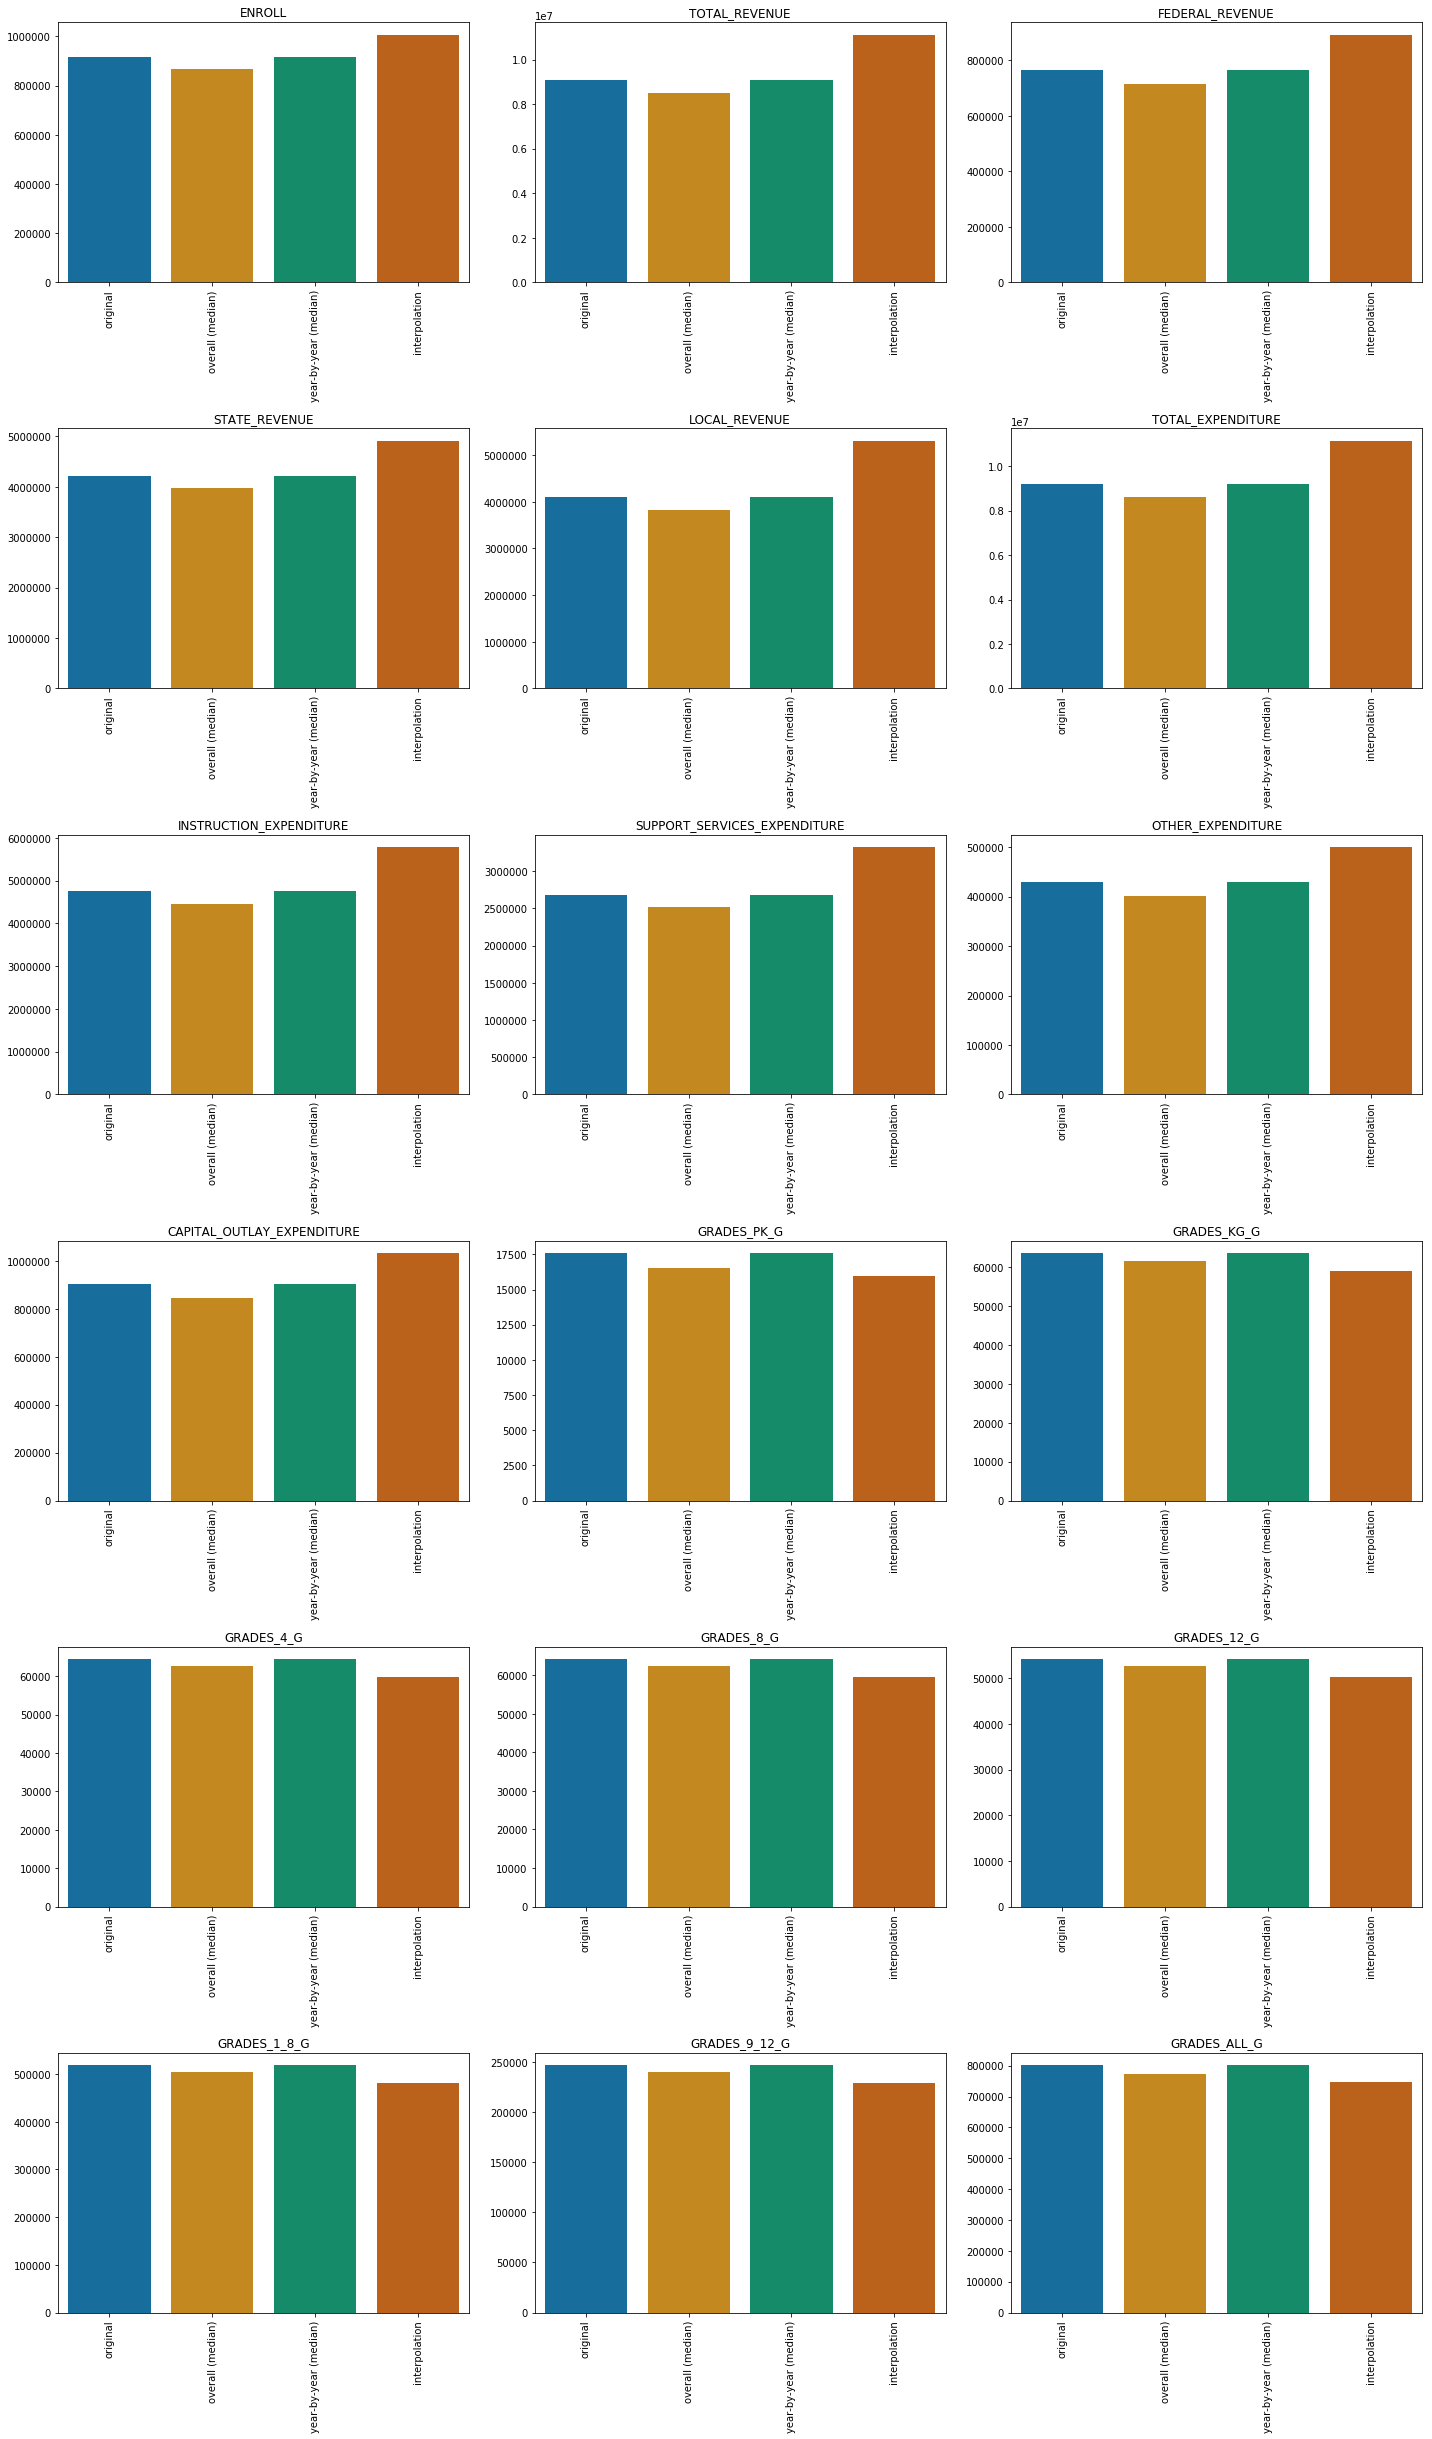

In [24]:
fig = plt.figure(figsize=(20,100))

for i, column in enumerate(columns):
    df = pd.concat([edu_df[column], edu_median_df2[column], edu_median_df3[column], edu_inter_df[column]], axis=1)
    
    plt.subplot(len(columns), 3, i+1)
    sns.barplot(["original", "overall (median)", "year-by-year (median)", "interpolation"], df.mean(), palette = 'colorblind')
    plt.xticks(rotation='vertical')
    plt.title(column)
    
plt.tight_layout();

The chart below, highlights the comparison of all approaches used to replace missing values against the original dataset using the "median" as the key metric (y-axes)

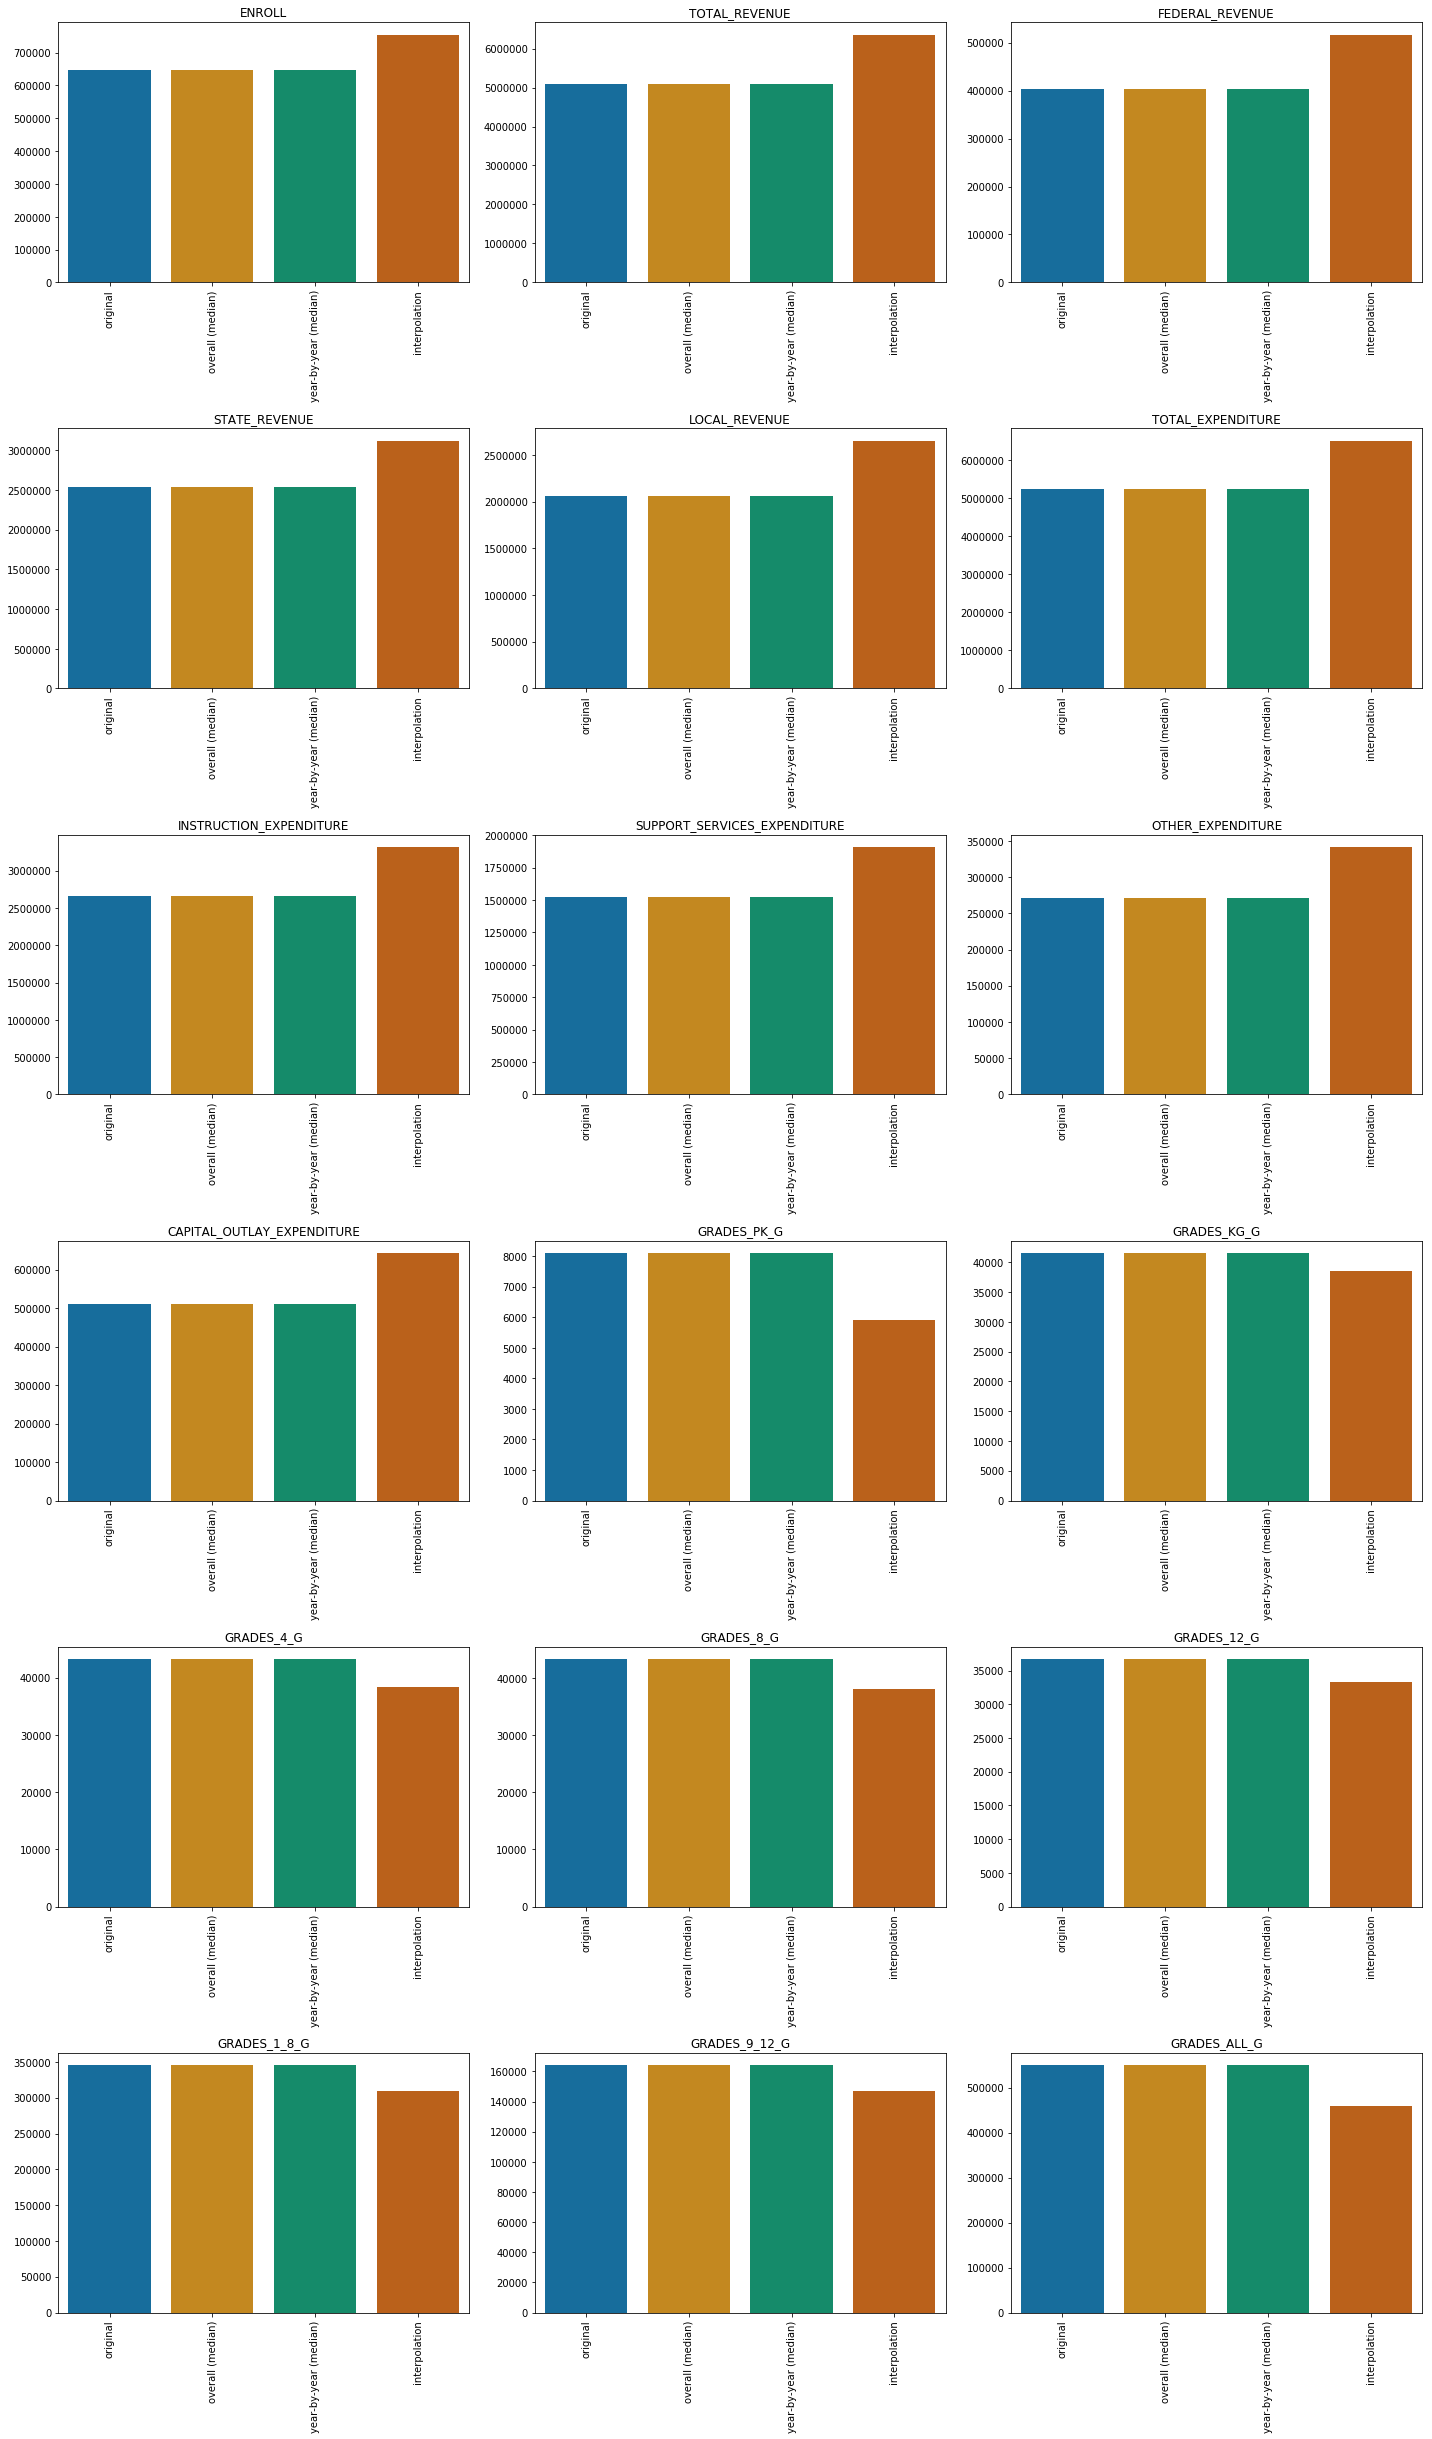

In [25]:
fig = plt.figure(figsize=(20,100))

for i, column in enumerate(columns):
    df = pd.concat([edu_df[column], edu_median_df2[column], edu_median_df3[column], edu_inter_df[column]], axis=1)
    
    plt.subplot(len(columns), 3, i+1)
    sns.barplot(["original", "overall (median)", "year-by-year (median)", "interpolation"], df.median(), palette = 'colorblind')
    plt.xticks(rotation='vertical')
    plt.title(column)
    
plt.tight_layout();

In this final figure, the comparison of the calculated "standard deviation" (y-axes) for each variable after replacing the missing values using the approaches described during this work is presented

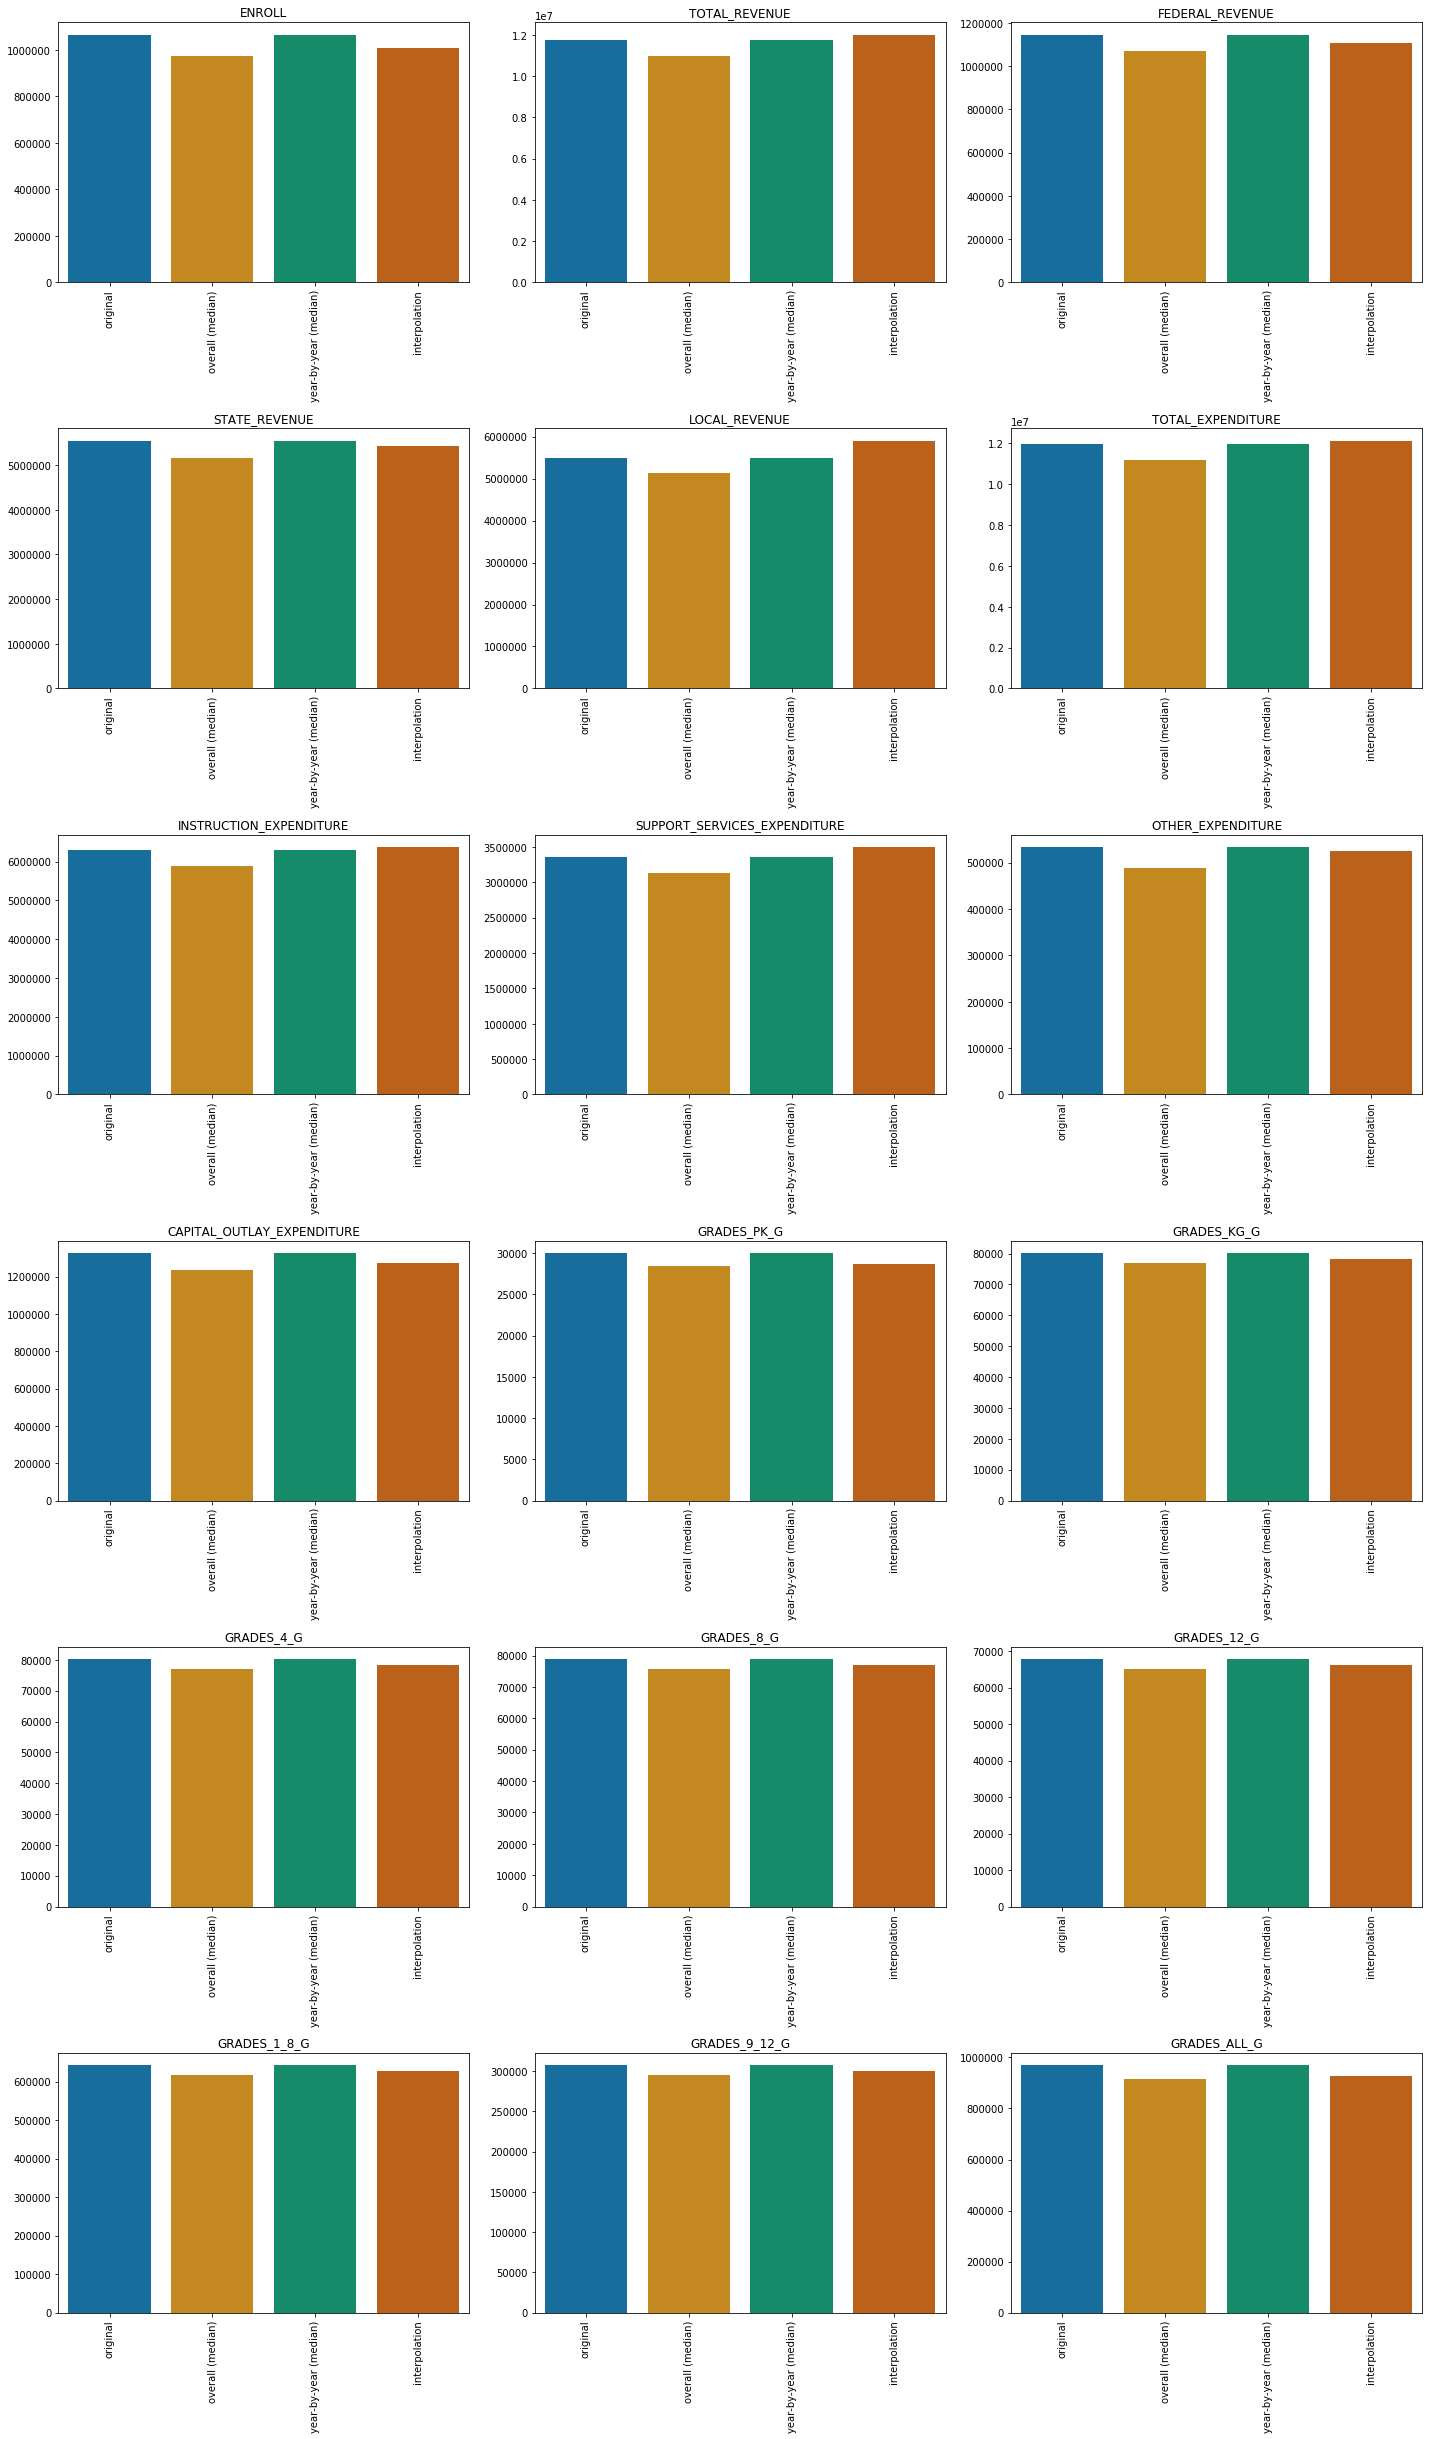

In [26]:
fig = plt.figure(figsize=(20,100))

for i, column in enumerate(columns):
    df = pd.concat([edu_df[column], edu_median_df2[column], edu_median_df3[column], edu_inter_df[column]], axis=1)
    
    plt.subplot(len(columns), 3, i+1)
    sns.barplot(["original", "overall (median)", "year-by-year (median)", "interpolation"], df.std(), palette = 'colorblind')
    plt.xticks(rotation='vertical')
    plt.title(column)
    
plt.tight_layout();

From the information summarized above, from the different approaches taken to address the presence of missing values in the working dataset, the use of the "median" for each column (overall) to replace missing values proven to be the most effective in causing minumum distortion to the summary statistics while effectively replacing the missing values. Other approaches such as year-by-year (median) were less detrimental of the summary statistics but did not succeed in replacing the missing values. The use of interpolation to complete the variables usually led to over- or underestimated statistics compared to the original dataset. 

Other approaches should be explored after cleaning the presence of duplicated 'STATE' values under a different names. For example, the use of interpolation will likely offer better results if done using a state-by-state approach were trends might be observed during the years. Due to the nature of the data, more reliable trends may be observed studying using the approaches explored in this work on a state-by-state fashion rather than year-to-year 